In [2]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import nltk # national language tool kit
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [3]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [4]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [5]:
len(train_list)

80

In [6]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
# 동사토큰 (빈도수 10개 이상)

In [7]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_v = (" ".join(r).strip())
    
    results3.append(rl_v)
    #print(rl_v)

In [8]:
token_list3 = str(results3).split(" ")

In [9]:
# 불용어 추가
stop_words3 = ['하다','찬','나','너','걸','수','다시다','내','고서','안','거','그','누구','보나','두','알','코','이','젠'\
                ,'난','해','널',',',"''",'곳',"안녕',","젤","'나르다","나다",'내다','잘',"그대","사람","하나요","안녕']"\
                ,"['나르다","'하다","기다리다',","하다',","싶다'","'이다","'보다","오다',","'만나다","'나다","안다',","'만들다"\
                ,"'오다","'내다","보다',","'어리다","해주다',","'잊다","'내리다","돌아오다',","'걷다","돼다',","쉬다',","주다',"\
                ,"가다',","싶다',","잖다","되어다","싶다","돼다","대다","되다"
                ]
token_ko3 = [each_word for each_word in token_list3 if each_word not in stop_words3]


In [12]:
# 불용어 작업후 빈도수가 1인 경우 전부 삭제 (특수기호 들어간경우가 대다수 이기때문에 제거하겠습니다.)
testing_v = []
for key, val in zip(list(ko3.vocab().keys()),list(ko3.vocab().values())):
    if val < 11:
        testing_v.append([key,val])
testing_v2 = []
for i in range(len(testing_v)):
    testing_v2.append(str(testing_v[i][0]))

In [13]:
# 1번 사용된 언어 지운후 다시 확인
token_ko_v = set(ko3.vocab()) - set(testing_v2)
token_ko_v2 = [each_word for each_word in token_list3 if each_word in token_ko_v]
ko_v = nltk.Text(token_ko_v2)
ko_v.vocab().most_common(500)

[('보다', 125),
 ('않다', 85),
 ('나르다', 63),
 ('오다', 56),
 ('잊다', 54),
 ('만나다', 38),
 ('주다', 37),
 ('지우다', 36),
 ('버리다', 35),
 ('보내다', 35),
 ('가다', 33),
 ('모르다', 31),
 ('웃다', 31),
 ('차다', 29),
 ('알다', 28),
 ('해주다', 28),
 ('말다', 27),
 ('돌아오다', 27),
 ('기다리다', 25),
 ('자다', 24),
 ('걷다', 23),
 ('들다', 22),
 ('걸다', 21),
 ('떠나다', 21),
 ('헤어지다', 21),
 ('부르다', 20),
 ('이다', 19),
 ('남다', 18),
 ('갈다', 17),
 ('지내다', 17),
 ('만들다', 16),
 ('서다', 15),
 ('바라보다', 14),
 ('그리다', 14),
 ('바라다', 14),
 ('찾다', 13),
 ('끝나다', 13),
 ('해보다', 13),
 ('지키다', 13),
 ('멈추다', 12),
 ('밝다', 12),
 ('멀어지다', 12),
 ('애쓰다', 12),
 ('들리다', 12),
 ('믿다', 12),
 ('불다', 12),
 ('보이다', 12),
 ('쉬다', 12),
 ('떨리다', 11),
 ('머물다', 11),
 ('견디다', 11),
 ('따르다', 11),
 ('뜨다', 11),
 ('안다', 11)]

In [14]:
len(ko_v.vocab())

54

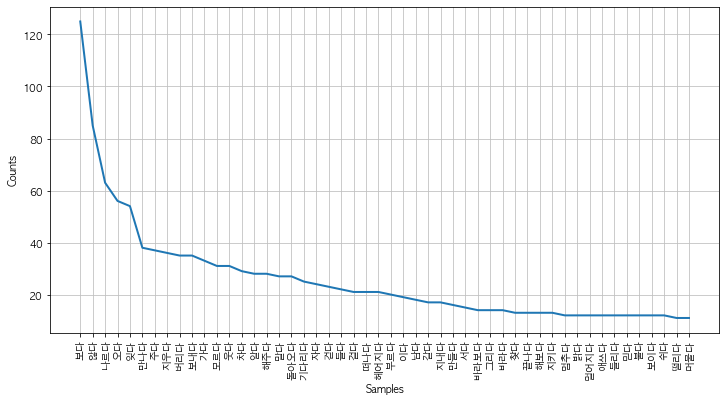

In [15]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko_v.plot(50)
plt.show()

In [16]:
#워드클라우드의 모양 설정. 동사이미지 가져오기
import numpy as np
from PIL import *
cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [17]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_v.vocab().most_common(200)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'gist_earth', # 글씨색은 ('copper','ocean','summer')
    mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

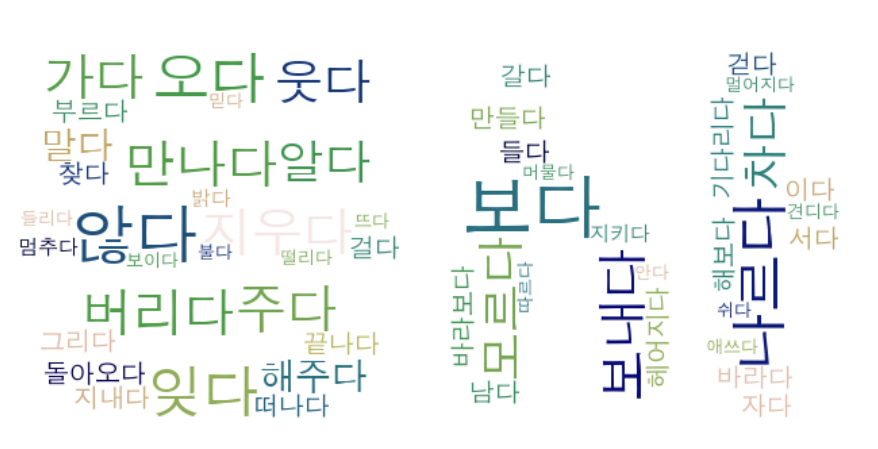

In [18]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 명사 토큰 (빈도수 10개 이상)

In [19]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 명사만 추출
            if word[1] in ["Noun"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl4 = (" ".join(r).strip())
    
    results4.append(rl4)
    #print(rl)

In [20]:
token_list4 = str(results4).split(" ")

In [21]:
# 명사갯수 (중복포함)
len(token_list4)

6680

In [22]:
# 불용어 추가
stop_words4 = ['내','너','네','우리','널','그대','넌','곳','나','수',"속","젠","게","알","해","거","미","일","우린","니","젠","때","알","걸"\
                "두","손","눈","것","이","두","볼","어디","하나요","아무","길","좀","뒤","척","안","마","모두","여기","건","비","품","번","줄"\
                ,"난난","살","그","더","난","사람","걸","'너","나나","땐","적","저기","채","입","그것","위","해도","수가","둘",\
                "듯","수',","사랑',","롤","요","저","감","'사랑","다시',","라면","은","뭐","땜","워","준","불","뿐","서서","순","울",\
                "우릴","남","발","춤","일도","란","전","온","중","말',","대도","만","낼","빈","오지","덜","방","무","진","투","드","돌",\
                "바랬는데","빗","오","보","거지","후","핀","잡","부시","거더","알',","게',","'혼자","수도","우리둘","래야","통해","'하루",\
                "애","아들","더욱더","전하","무엇","끝내기","티","겉","헤어지자","사이',","'나","'내","더',","굽","녹","테","세","'오늘",\
                "것',","'그대","그대',","너',","날',","친구","내겐","단","다가","누가","듯이","안고","물","활","첫","목","픈","바","몇",\
                "쉬","철","나라","죽","찬","지고","나로","감고","보이","운","다한","룰","식이","이면","날수","남지","만이","째깍","번이","날"
                ]
token_ko4 = [each_word for each_word in token_list4 if each_word not in stop_words4]
ko4 = nltk.Text(token_ko4)

In [23]:
# 빈도수 10 개인경우 삭제
testing = []
for key, val in zip(list(ko4.vocab().keys()),list(ko4.vocab().values())):
    if val < 11:
        testing.append([key,val])
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

In [24]:
# 빈도수 10 번 언어 지운후 다시 확인
token_ko5 = set(ko4.vocab()) - set(testing2)
token_ko6 = [each_word for each_word in token_list4 if each_word in token_ko5]
ko_n = nltk.Text(token_ko6)
ko_n.vocab().most_common(500)

[('사랑', 204),
 ('말', 133),
 ('왜', 69),
 ('이별', 68),
 ('생각', 62),
 ('맘', 54),
 ('다시', 53),
 ('밤', 52),
 ('시간', 50),
 ('못', 49),
 ('이제', 46),
 ('마음', 44),
 ('보고', 43),
 ('오늘', 39),
 ('기억', 36),
 ('혼자', 35),
 ('그때', 33),
 ('끝', 32),
 ('눈물', 32),
 ('곁', 30),
 ('모습', 30),
 ('하루', 30),
 ('추억', 30),
 ('또', 30),
 ('모든', 29),
 ('정말', 29),
 ('혹시', 28),
 ('서로', 26),
 ('그날', 25),
 ('지금', 25),
 ('처음', 24),
 ('매일', 22),
 ('가슴', 22),
 ('세상', 22),
 ('꼭', 22),
 ('순간', 19),
 ('바람', 19),
 ('자꾸', 18),
 ('하나', 18),
 ('잠', 17),
 ('항상', 17),
 ('햇살', 16),
 ('멀리', 16),
 ('그게', 15),
 ('그냥', 15),
 ('후회', 15),
 ('다른', 14),
 ('전부', 14),
 ('노래', 14),
 ('그땐', 14),
 ('잡고', 13),
 ('사이', 13),
 ('소리', 13),
 ('남아', 13),
 ('만큼', 13),
 ('꿈', 12),
 ('노력', 12),
 ('사실', 12),
 ('조금', 12),
 ('마지막', 11),
 ('늘', 11),
 ('준비', 11),
 ('바보', 11),
 ('그녀', 11),
 ('술잔', 11)]

In [25]:
# 명사 토큰 갯수 (중복제외)
len(list(ko_n.vocab()))

65

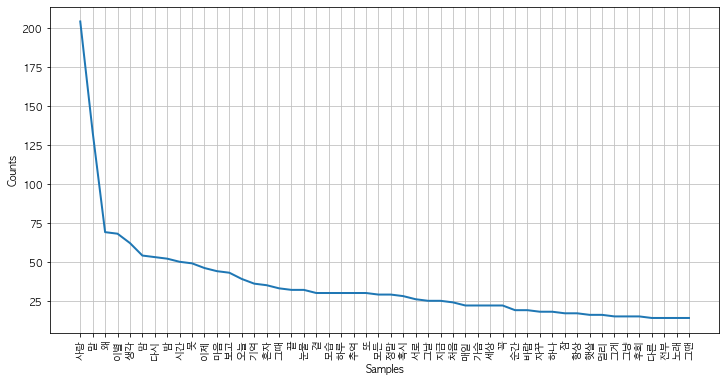

In [26]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko_n.plot(50)
plt.show()

In [27]:
cand_mask_n=np.array(Image.open('../../Data/image/명사.png'))

In [28]:
# 상위 100개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko_n.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    colormap= 'gist_earth', # 글씨색은 ('copper','ocean','summer')
    mask=cand_mask_n, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

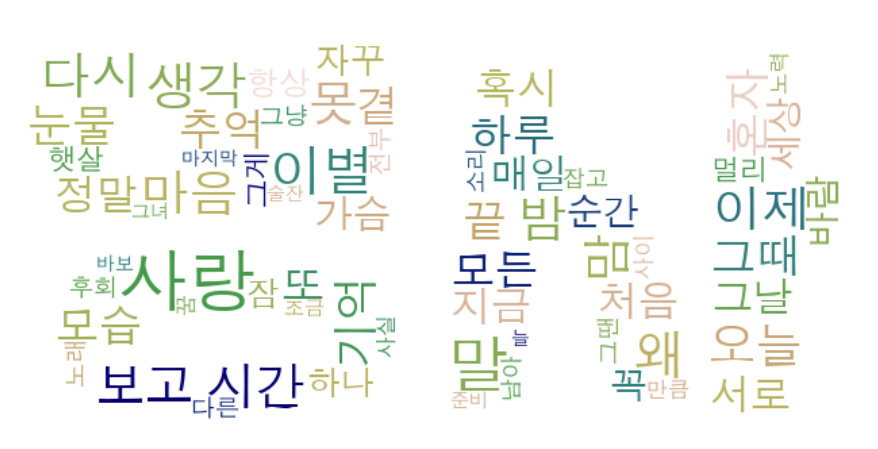

In [29]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 추출한 토큰 확인하기

In [30]:
# 동사 토큰, 명사 토큰
print("동사토큰 : \n",list(ko_v.vocab())," => 동사 토큰 갯수 : ",len(list(ko_v.vocab())),
"\n\n명사토큰 : \n",list(ko_n.vocab())," =>명사 토큰 갯수 : ",len(list(ko_n.vocab())))
print("총 합 :",len(list(ko_v.vocab()))+len(list(ko_n.vocab())))

동사토큰 : 
 ['보다', '않다', '나르다', '오다', '잊다', '만나다', '주다', '지우다', '버리다', '보내다', '가다', '모르다', '웃다', '차다', '알다', '해주다', '말다', '돌아오다', '기다리다', '자다', '걷다', '들다', '걸다', '떠나다', '헤어지다', '부르다', '이다', '남다', '갈다', '지내다', '만들다', '서다', '바라보다', '그리다', '바라다', '찾다', '끝나다', '해보다', '지키다', '멈추다', '밝다', '멀어지다', '애쓰다', '들리다', '믿다', '불다', '보이다', '쉬다', '떨리다', '머물다', '견디다', '따르다', '뜨다', '안다']  => 동사 토큰 갯수 :  54 

명사토큰 : 
 ['사랑', '말', '왜', '이별', '생각', '맘', '다시', '밤', '시간', '못', '이제', '마음', '보고', '오늘', '기억', '혼자', '그때', '끝', '눈물', '곁', '모습', '하루', '추억', '또', '모든', '정말', '혹시', '서로', '그날', '지금', '처음', '매일', '가슴', '세상', '꼭', '순간', '바람', '자꾸', '하나', '잠', '항상', '햇살', '멀리', '그게', '그냥', '후회', '다른', '전부', '노래', '그땐', '잡고', '사이', '소리', '남아', '만큼', '꿈', '노력', '사실', '조금', '마지막', '늘', '준비', '바보', '그녀', '술잔']  =>명사 토큰 갯수 :  65
총 합 : 119


In [31]:
token_sum = list(ko_v.vocab())+list(ko_n.vocab())

---
# 토큰 one hot
- 토큰을 동사와 명사의 현재형으로 저장했기 때문에 가사를 okt로 동사+명사로 전체 바꿔줘야함

In [32]:
from tensorflow import keras

In [33]:
# 가사 데이터 okt로 분류하기 
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb","Noun"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [34]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result[0]

'처음 널 만나다 대화 사랑 빠지다 우린 손 마주 잡고 도시 거닐다 비 오다 골목 어귀 발 멈추다 바라보다 입 맞추다 모르다 어둠 오다 밝다 빛나다 별빛 아래 음악 취해 서로 기대다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 잊다 하다 서로 품 안고 온기 느끼다 날 잠 들다 때 비추다 햇살 가끔 우린 다른 모습 말 멈추다 침묵 오다 때 마음 다투다 보다 오직 둘 알다 말 미소 되다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 널 처음 마주 순간 알 수 나르다 보다 지다 그 미소 그게 내 부란 걸 내 마음 담다 너 고백 하다 영원 나르다 안다 너 곁 눈 감 때 눈 감 때 눈 감 때'

In [35]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [36]:
print((encoded[0]))

[85, 0, 0, 0, 0, 109, 3, 101, 0, 0, 0, 0, 112, 0, 0, 0, 84, 101, 0, 0, 0, 0, 0, 0, 114, 7, 0, 105, 0, 0, 0, 63, 0, 0, 0, 101, 0, 0, 0, 68, 101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 77, 101, 0, 117, 0, 67, 101, 0, 0, 0, 0, 77, 101, 0, 79, 0, 101, 0, 0, 0, 0, 68, 101, 0, 41, 101, 0, 0, 3, 101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 82, 0, 0, 69, 0, 101, 0, 40, 77, 101, 0, 9, 0, 101, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 65, 82, 0, 0, 0, 0, 93, 101, 0, 0, 0, 74, 0, 73, 0, 0, 0, 0, 0, 5, 101, 0, 93, 101, 0, 82, 0, 0, 0, 0, 54, 0, 0, 0, 69, 0, 0, 0, 101, 0, 0, 0, 94, 0, 44, 101, 0, 0, 0, 0, 77, 101, 0, 96, 0, 0, 87, 0, 0, 0, 0, 0, 101, 0, 0, 79, 0, 0, 56, 0, 40, 77, 101, 0, 0, 0, 0, 68, 101, 0, 0, 0, 114, 0, 0, 101, 0, 101, 0, 67, 101, 0, 68, 0, 0, 0, 0, 15, 101, 0, 56, 0, 0, 107, 0, 0, 101, 0, 40, 77, 101, 0, 9, 0, 101, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 65, 82, 0, 0, 0, 0, 93, 101, 0, 0, 0, 74, 0, 73, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 114, 7, 0, 90, 0, 0, 15, 0, 0, 0, 3, 0, 101, 0, 67, 101, 0, 84, 101, 0, 1

---
# 전체 길이 padding작업

In [37]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 558
가사의 최소 길이 : 184
가사의 평균 길이 : 349.300000


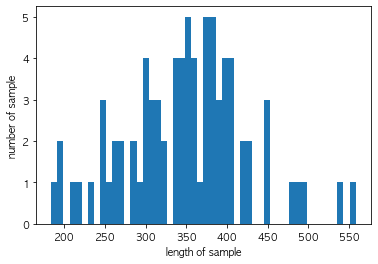

In [38]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [39]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[ 85,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [118,   0,   0, ...,   0,   0,   0],
       [ 70,  92,   0, ...,   0,   0,   0],
       [  3,   0, 101, ...,   0,   0,   0]], dtype=int32)

In [40]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 558


In [41]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [42]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [63]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [64]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [65]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

warnings.filterwarnings('ignore')

In [66]:
print(train_input.shape, val_input.shape)

(51, 558) (13, 558)


In [67]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(558, 120),dropout=0.1))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [68]:
import numpy as np

In [69]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 558, 120)

In [70]:
print(np.sum(train_oh[0][0]))

1.0


In [71]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 558, 120)

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                11840     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 12,100
Trainable params: 12,100
Non-trainable params: 0
_________________________________________________________________


In [79]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=1000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/1000
2/2 [==============================] - 1s 296ms/step - loss: 1.3983 - accuracy: 0.2157 - val_loss: 1.4493 - val_accuracy: 0.1538
Epoch 2/1000
2/2 [==============================] - 0s 59ms/step - loss: 1.3583 - accuracy: 0.2157 - val_loss: 1.3620 - val_accuracy: 0.3077
Epoch 3/1000
2/2 [==============================] - 0s 60ms/step - loss: 1.3769 - accuracy: 0.2549 - val_loss: 1.4479 - val_accuracy: 0.1538
Epoch 4/1000
2/2 [==============================] - 0s 63ms/step - loss: 1.3271 - accuracy: 0.3529 - val_loss: 1.3892 - val_accuracy: 0.3846
Epoch 5/1000
2/2 [==============================] - 0s 60ms/step - loss: 1.3368 - accuracy: 0.3333 - val_loss: 1.3900 - val_accuracy: 0.0769
Epoch 6/1000
2/2 [==============================] - 0s 64ms/step - loss: 1.3687 - accuracy: 0.3529 - val_loss: 1.3884 - val_accuracy: 0.1538
Epoch 7/1000
2/2 [==============================] - 0s 60ms/step - loss: 1.3606 - accuracy: 0.3137 - val_loss: 1.4027 - val_accuracy: 0.1538
Epoch 8/1000

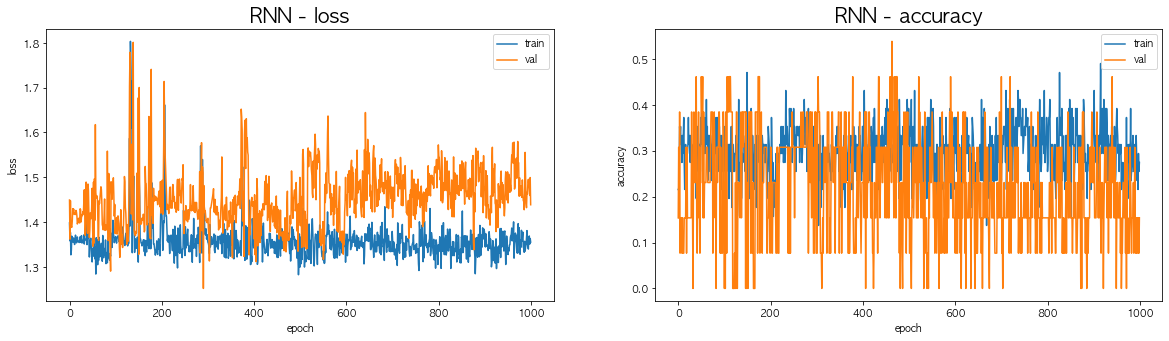

In [81]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

> 정확도가 약간 올라갔다.  
> 아직 토큰의 갯수가 훈련데이터 갯수에 비해 많은 것 같다.